In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df["Taxable.Income"] = np.where((df["Taxable.Income"]<30000), "Risky", "Good")
df.sample(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
453,YES,Single,Good,41504,26,NO
348,YES,Single,Good,42269,2,NO
559,YES,Divorced,Good,180424,26,NO
277,NO,Divorced,Good,117364,11,NO
182,NO,Divorced,Risky,89632,4,YES
31,NO,Divorced,Good,147414,21,NO
391,NO,Married,Good,29934,1,NO
492,YES,Single,Good,98123,18,YES
82,NO,Divorced,Good,111068,26,YES
585,NO,Single,Good,137622,2,YES


In [7]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

# One hot encoding

In [8]:
data=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=False)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


# Pairplot

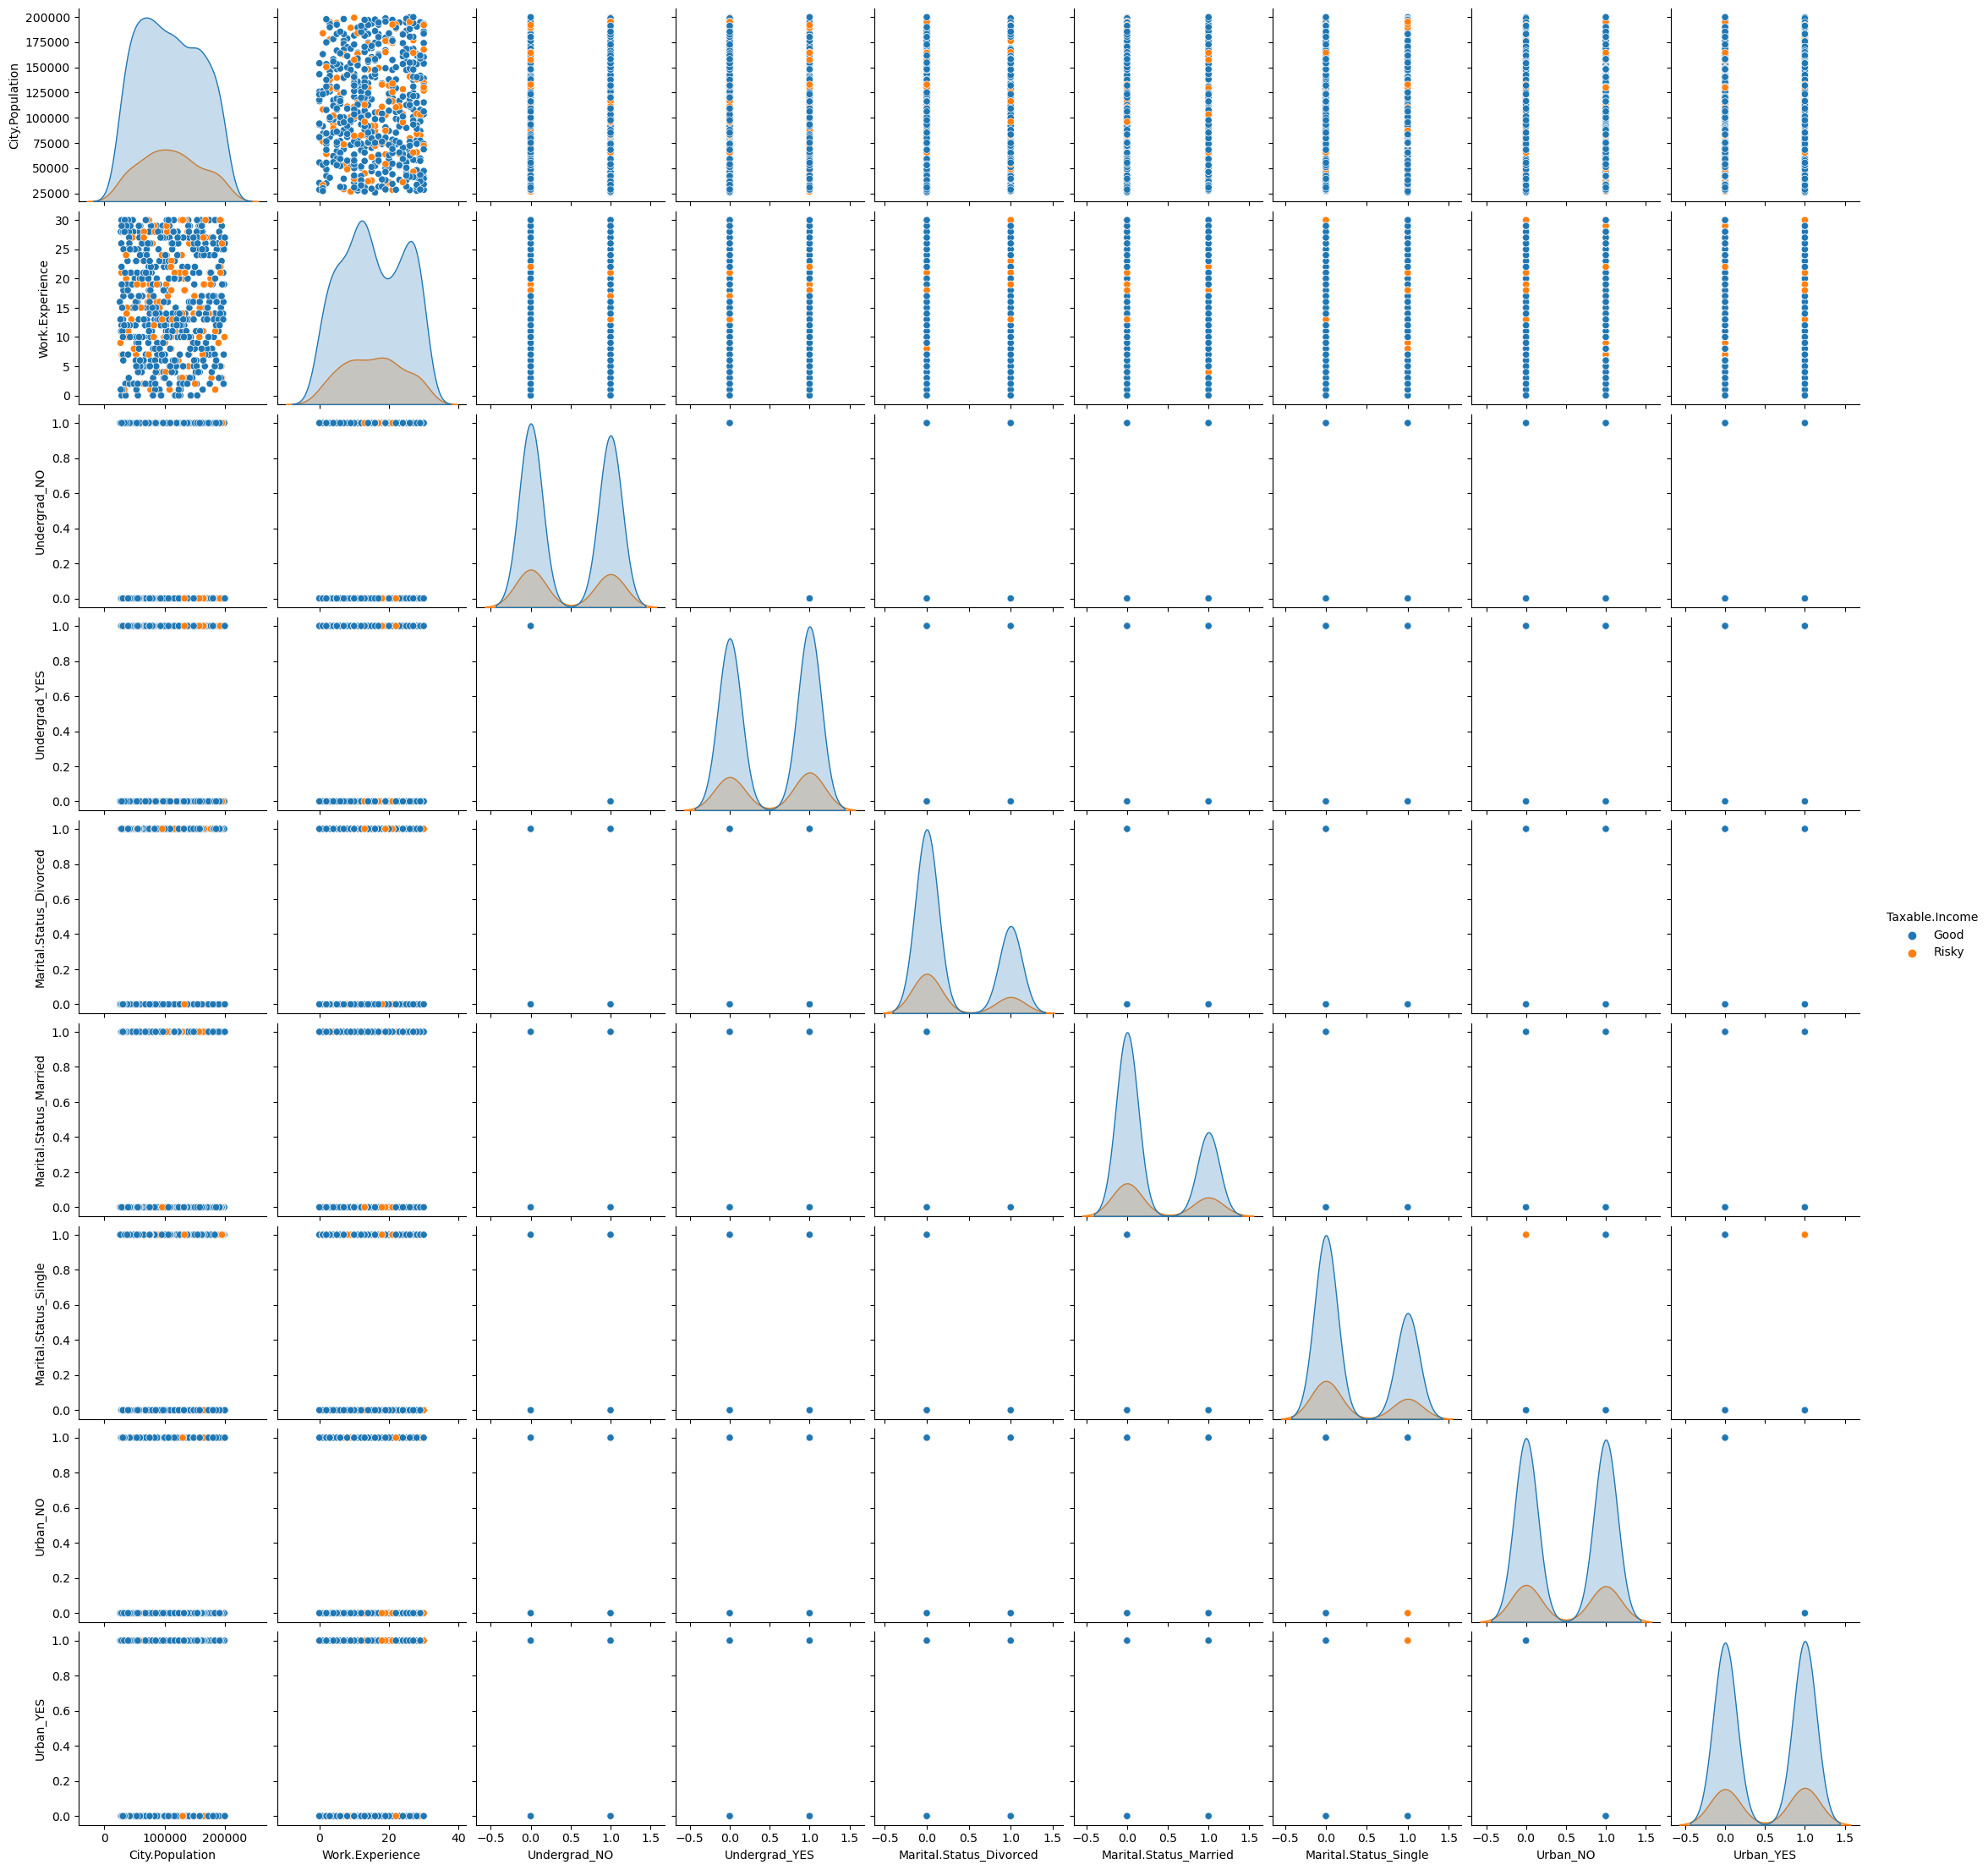

In [9]:
import seaborn as sns
sns.pairplot(data=data, hue = 'Taxable.Income')

labeling the Taxable.Income GOOD and Risky into 0 and 1 

In [10]:
data["Taxable.Income"] = data["Taxable.Income"].astype('category')
data["Taxable.Income"] = data["Taxable.Income"].cat.codes
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


Normalization of data set using min-max

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
col_names = list(data.columns)

In [13]:
col_names

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [14]:
scaler = MinMaxScaler()

scaler.fit(data)

data_norm = scaler.transform(data)

In [15]:
data_df = pd.DataFrame(data_norm)
data_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [23]:
data_df.columns = ['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

deviding the data set into target and predictor variable


In [24]:
X = data_df.drop(['Taxable.Income'], axis=1)
Y = data_df['Taxable.Income']

Splitting the dataset

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=33)

# Building the model random Forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = model.predict(x_test)

Evaluating the performance of the model

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6916666666666667


acuracy=69.16%

# hyperparameters tuning using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model1 = RandomForestClassifier()

# Performing a grid search to find the best hyperparameters
grid_search = GridSearchCV(model1, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Using the best hyperparameters to make predictions on the test set
y_pred = grid_search.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


accuracy is improves to 75%